<div style="text-align: center;">
<h2>INFSCI 2915 Foundations- Machine Learning - Spring 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Issued Tuesday, 2/06/2018; Due Tuesday, 11:59pm, 2/13/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [1]:
# Type in your information in the double quotes
firstName = "YUHAO"
lastName = "WU"
pittID = "yuw121"

--

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0|3|0|Green|
|2 |2|0|0|Green|
|3|0|1|3|Green|
|4|0|1|2|Red|
|5|-1|0|1|Red|
|6|1|1|1|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [1]:
#Write your narrative answer here
import numpy as np
x=np.array([[0,3,0],
           [2,0,0],
           [0,1,3],
           [0,1,2],
           [-1,0,1],
           [1,1,1]])
test=[0,0,0]
Obs=1
for i in x:
    dist=np.linalg.norm(i-test)
    print("The distance between observation ",Obs," and test is ",dist)
    Obs=Obs+1;

The distance between observation  1  and test is  3.0
The distance between observation  2  and test is  2.0
The distance between observation  3  and test is  3.1622776601683795
The distance between observation  4  and test is  2.23606797749979
The distance between observation  5  and test is  1.4142135623730951
The distance between observation  6  and test is  1.7320508075688772


<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

In [2]:
#Write your narrative answer here
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y=np.array(["Green","Green","Green","Red","Red","Green"])
# y=y[:,np.newaxis]
# dataset=np.concatenate((x,y),axis=1)

k=1
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)
print(knn.predict([[0,0,0]]))
# predict_pro=knn.predict_proba([[0,0,0]])
# print("When k= ",k," Accuracy is ",predict_pro)

['Red']


In [ ]:
When we just find the one of the nearest points, the red one is the shortest distance one.

<b>Problem #1-3.</b> What is our prediction with K = 3? and explain why.

In [3]:
#Write your narrative answer here
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)
print(knn.predict([[0,0,0]]))

['Green']


In [ ]:
When we choose three of the nearest points, we find two points are green, 
whereas the remain one is red, so we choose the more points' color as our result of prediction

<b>Problem #1-4.</b>  How using a different number of K has an impact on the performance? explain.

In [ ]:
#Write your narrative answer here
K is K points which are closest to test point,
if we just choose few points, may be our prediction will be limited in a small range(overfitting) and have high variance.
But if we choose too many points, may be our prediction will be underfitting and have high bias.

---

<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data

|Smoke index(x)|Lung cancer mortality index(y)|
|:--:|:-------------------------------:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

In [4]:
#Write your narrative answer here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=np.array([127,121,94,126,102,111,95,89,101])
y=np.array([115,128,128,156,101,128,115,105,87])
x_ave=np.mean(x)
y_ave=np.mean(y)
up=0;
down=0

for index in range(len(x)):
    up=up+(y[index]-y_ave)*(x[index]-x_ave)
    down=down+pow(x[index]-x_ave,2)
B1=up/down
B2=y_ave-B1*x_ave
print(B1)
print(B2)


# method two
x=x.reshape(-1,1)
y=y.reshape(-1,1)
linreg= LinearRegression().fit(x, y)
print("The coefficient of TV feature is:",linreg.coef_)
print("The intercept is: ", linreg.intercept_)


0.7500998003992017
37.6003992015968
The coefficient of TV feature is: [[0.7500998]]
The intercept is:  [37.6003992]


<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model

|Xi|Yi|
|:--:|:-------------------------------:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

In [5]:
#Write your narrative answer here
from sklearn.metrics import r2_score
xi=np.array([90,106,105,115,113])
yi=np.array([103,131,85,99,144])


y_pred=B2+B1*xi
RSS=sum(pow((y_pred-yi),2))
TSS=sum(pow((yi-np.mean(yi)),2))
R2=1-RSS/TSS
print(R2)


# method two
print(r2_score(yi,y_pred))

0.040627525222455496
0.040627525222455496


---

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
Here use a code below to download the  dataset: 

In [6]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
dataset = load_boston()
print(dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR'])


<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [7]:
#Write your narrative answer here
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
 MEDV  Median value of owner-occupied homes in $1000's

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the highest range (minimum and maximum value)?

-  Which feature has the lowest mean?  

-  Which feature has a lowest standard deviation? 

In [8]:
#Write your narrative answer here
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
Answer:
TAX have the highest range.
CHAS have lowest mean.
CHAS have lowest standard deviation

<b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

In [ ]:
#Write your narrative answer here

I recommend feature scaling because the value of each feature have a large difference.
If we don't do job in feature scaling, some features will cause larger influence on the prediction.
We should keep balance in weight
MinMaxScaler: scales features to be in range 0 -1
StandardScaler: scales features so that they are all with zero mean and unit
variance

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the lowest number in the table? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [9]:
#Write your narrative answer here
df['target'] = dataset.target
print(df.corr())


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

In [ ]:
Answer:
the positive number means this feature has positive correlation with target, when it add, target will add
the negative number means this feature has negative correlation with target, when it add, target will decrease
the lowest number is -0.737663 (LSTAT) includes negative number,it has the most helpful influnence on target.
or we do not consider negative number, the lowest number is 0.175260 (CHAS) which is least helpful in target.

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT? 
- What does this value of correlation indicate?
- Can you detect most or the least helpful features in predicting the target class from correlation matrix or from plot? How?

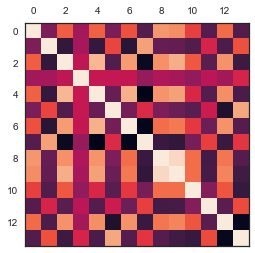

In [10]:
%matplotlib notebook
%matplotlib inline
from sklearn.datasets import load_boston
dataset = load_boston()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Get correlation matrix
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target

plt.matshow(df.corr())

corr = df.corr()
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.9, cbar_kws={"shrink": .7})

In [ ]:
#Write your narrative answer here
We can see in the graph the correlation between LSTAT and RM is smaller than negative 0.6, 
which means these two features have large negative correlation.
When we talked about the most helpful features, we just need to find the maximum absolute value in the row of target in matrix,
or the most blue or the most red one in the row of target in the plot.
On the contrary, when we find the least helpful features, we just need to find the minimum absolute value in the row of target in matrix,
or the least blue or the least red one in the row of target in the plot

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot LSTAT versus target variable 
- Plot RM versus target variable 
- Plot CHAS versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your chouce


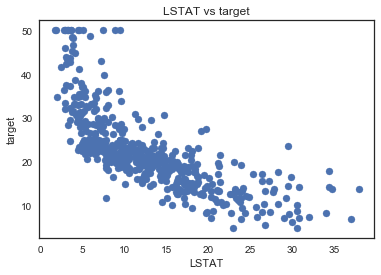

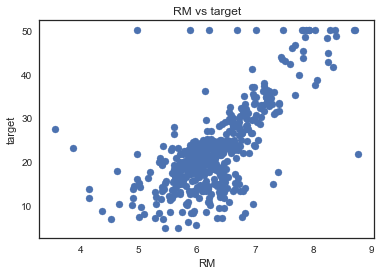

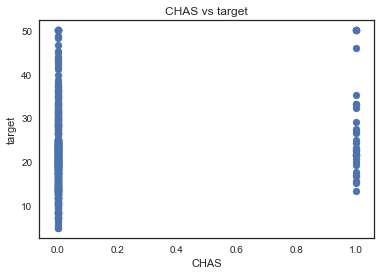

The coefficient of TV feature is: [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
The intercept is:  13


In [11]:
#Write your narrative answer here
import matplotlib.pyplot as plt

plt.scatter(df.LSTAT,df.target,marker='o')
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.title('LSTAT vs target')
plt.show()

plt.scatter(df.RM,df.target,marker='o')
plt.xlabel('RM')
plt.ylabel('target')
plt.title('RM vs target')
plt.show()

plt.scatter(df.CHAS,df.target,marker='o')
plt.xlabel('CHAS')
plt.ylabel('target')
plt.title('CHAS vs target')
plt.show()

x=df.drop('target',axis=1)
y=df['target']
linreg= LinearRegression().fit(x, y)
print("The coefficient of TV feature is:",linreg.coef_)
print("The intercept is: ", len(linreg.coef_))



In [ ]:
RM looks like liner and CHAS looks the most nonliner, because the value of CHAS focus on the 0.0 or 1.0


<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^3$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

In [12]:
RM=df.RM.values.reshape(-1,1)
LSTAT=df.LSTAT.values.reshape(-1,1)
x=np.concatenate((RM,LSTAT),axis=1)
y=df.target.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(x, y, random_state= 0)
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
print("1. RM and LSTAT, R-squared metric is ",fitted_model.score(X_test,Y_test))


x2=np.concatenate((x,RM*LSTAT),axis=1)
y=df.target.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(x2, y, random_state= 0)
model2=LinearRegression()
fitted_model2=model2.fit(X_train,Y_train)
print("2. RM, LSTAT and RM*LSTAT, R-squared metric is ",fitted_model2.score(X_test,Y_test))
print("   R-squared metric increase with the interaction term")



x3=np.concatenate((LSTAT,LSTAT**2),axis=1)
y=df.target.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(x3, y, random_state= 0)
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
print("3. LSTAT and LSTAT*LSTAT, R-squared metric is ",fitted_model.score(X_test,Y_test))


x4=np.concatenate((x3,LSTAT**3),axis=1)
y=df.target.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(x4, y, random_state= 0)
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
print("4. LSTAT.LSTAT*LSTAT and LSTAT*LSTAT*LSTAT, R-squared metric is ",fitted_model.score(X_test,Y_test))
print("   the second model has the highest score which means it is the best one. With the add higher polynomial parameter in LASTA, R-squared metric become higher and higher")

1. RM and LSTAT, R-squared metric is  0.5692445415835343
2. RM, LSTAT and RM*LSTAT, R-squared metric is  0.6615207706770674
   R-squared metric increase with the interaction term
3. LSTAT and LSTAT*LSTAT, R-squared metric is  0.5518753354137798
4. LSTAT.LSTAT*LSTAT and LSTAT*LSTAT*LSTAT, R-squared metric is  0.5768833545180131
   the second model has the highest score which means it is the best one. With the add higher polynomial parameter in LASTA, R-squared metric become higher and higher


<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means
- What are the important features? <br> 


In [13]:
import statsmodels.formula.api as smf
dataset=load_boston()

X=dataset.data
Y=dataset.target
model = smf.OLS(Y,X)
m1=model.fit()
print("P-values are: ",m1.pvalues)

P-values are:  [7.72821694e-03 7.84953865e-04 9.53259396e-01 1.67647917e-03
 3.91560359e-01 1.32170397e-61 6.01281955e-01 1.03317143e-06
 1.09449661e-02 1.70830962e-02 3.90000737e-04 4.39981847e-08
 1.89224631e-15]


In [ ]:
the features which have small p-values are important features

---

<h3>  Problem #4. Ordinary Least Square (OLS) [20 points] </h3> <br>

<b>Problem #4-1.</b>  Ordinary Least Square (OLS), calculate parameters

Follow two steps<br> 

- From your DataFrame generate new DataFrame with 2 columns ('LSTAT' and target)  

- Using the least squared formula below write a function to calulate $B_0$  and $B_1$  from your new DataFrame where 'LSTAT' = x and target = y. *(hint you can add 2 colums to your DataFrame($x*x$  and  $x*y$), check the problem #2-1)*

\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

In [14]:
#Write your narrative answer here
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target']=dataset.target
df2=df[['LSTAT','target']]

LSTAT=df2.LSTAT.values.reshape(-1,1)
target=df2.target.values.reshape(-1,1)
# X_train, X_test, Y_train, Y_test= train_test_split(LSTAT,target, random_state= 0)
# linreg= LinearRegression().fit(X_train, Y_train)
# print("The coefficient of TV feature is:",linreg.coef_)
# print("The intercept is: ", linreg.intercept_)


# method two
L_ave=np.mean(LSTAT)
t_ave=np.mean(target)
up=0;
down=0

for index in range(len(LSTAT)):
    up=up+(target[index]-t_ave)*(LSTAT[index]-L_ave)
    down=down+pow(LSTAT[index]-L_ave,2)
B1=up/down
B0=t_ave-B1*L_ave
print("B1 is ",B1)
print("B0 is ",B0)


B1 is  [-0.95004935]
B0 is  [34.55384088]


<b>Problem #4-2.</b>  Ordinary Least Square (OLS) <br>
Using formula below and using $B_0$ and $B_1$ from previous problem calculate $\hat{y}$ $where$ x = 'LSTAT'
- Add your predicted data to the DataFrame 


\begin{array} \\
    \hat{y} = \hat{\beta}_0 + \hat{\beta}_1*x, \\ \\
\end{array}

In [15]:
#Write your narrative answer here

t_pred=B2+B1*LSTAT
# RSS=sum(pow((t_pred-target),2))
# TSS=sum(pow((target-np.mean(target)),2))
# R2=1-RSS/TSS
# print(R2)


t_pred=t_pred.reshape(-1)
df3 = (pd.DataFrame(df2))
df3['predict']=pd.Series(t_pred)
df3

,LSTAT,target,predict
0,4.98,24.0,32.869153
1,9.14,21.6,28.916948
2,4.03,34.7,33.771700
3,2.94,33.4,34.807254
4,5.33,36.2,32.536636
5,5.21,28.7,32.650642
6,12.43,22.9,25.791286
7,19.15,27.1,19.406954
8,29.93,16.5,9.165422
9,17.10,18.9,21.354555


<b>Problem #4-3.</b>  Verification 

Predict $\hat{y}$ using linear regression model *(for this part you don't need to use train test split) *

- Add your predicted data to the DataFrame

Compare 3 column:
- target 
- predicted column using our own code, (problem 2-9)
- predicted column using linear regression model 

Comment your observations 



In [16]:
#Write your narrative answer here
linreg= LinearRegression().fit(LSTAT, target)
print("The coefficient of TV feature is:",linreg.coef_)
print("The intercept is: ", linreg.intercept_)

predict=linreg.predict(LSTAT)
predict=predict.reshape(-1)
df4 = (pd.DataFrame(df3))
df4['liner regression predict']=pd.Series(predict)
df4

The coefficient of TV feature is: [[-0.95004935]]
The intercept is:  [34.55384088]


,LSTAT,target,predict,liner regression predict
0,4.98,24.0,32.869153,29.822595
1,9.14,21.6,28.916948,25.870390
2,4.03,34.7,33.771700,30.725142
3,2.94,33.4,34.807254,31.760696
4,5.33,36.2,32.536636,29.490078
5,5.21,28.7,32.650642,29.604084
6,12.43,22.9,25.791286,22.744727
7,19.15,27.1,19.406954,16.360396
8,29.93,16.5,9.165422,6.118864
9,17.10,18.9,21.354555,18.307997


In [ ]:
my own code and liner regression have same prediction
it proves that when using same dataset, liner regression will have same result.

### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb